In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, GRU, Bidirectional, BatchNormalization, Dropout, CuDNNGRU
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras.utils.io_utils import HDF5Matrix
from keras.callbacks import History 
history = History()

model = Sequential()
#define first two bidirectional lstm/gru layer with around 300 neurons
model.add(Bidirectional(CuDNNGRU(300, return_sequences=True), input_shape=(220, 75)))
model.add(Bidirectional(CuDNNGRU(300)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.6))

#define a fully connected hidden layer with about 300 neurons
model.add(Dense(300))
model.add(Activation('relu'))

#define a output layer with 3 neurons
model.add(Dense(8))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01, decay=0.5),  metrics=['accuracy'])

# Generator section
def data_generator(totalsamples, batchsize = 100):

    number_of_batches = totalsamples/batchsize
    start = 0
    while 1:
        X = HDF5Matrix('D:/Major Project/RNN25traindataset.h5', 'traindata', start, start + batchsize)
        y = HDF5Matrix('D:/Major Project/RNN25traindataset.h5', 'trainlabel', start, start + batchsize)
        start = start + batchsize
        yield (X,y)
        
        #restart counter to yeild data in the next epoch as well
        if start > number_of_batches:
            start = 0

# for layer in model.layers:
#     weights = layer.get_weights() # list of numpy arrays

vtrain = HDF5Matrix('D:/Major Project/RNN25testdataset.h5', 'testdata', 0, 200)
vtarget = HDF5Matrix('D:/Major Project/RNN25testdataset.h5', 'testlabel', 0, 200)

# Early stopping for no progress in validation in loss
# es = EarlyStopping(monitor='val_acc', min_delta=0.1, patience=4, verbose=1, mode='auto')



getdata = data_generator(7200, 72)
model.fit_generator(generator = getdata, steps_per_epoch=100, epochs=20,
                    verbose=2, validation_data=(vtrain, vtarget), shuffle=True, callbacks=[history])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 220, 600)          676800    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 600)               1621800   
_________________________________________________________________
batch_normalization_3 (Batch (None, 600)               2400      
_________________________________________________________________
activation_7 (Activation)    (None, 600)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               180300    
_________________________________________________________________
activation_8 (Activation)    (None, 300)               0         
__________

InternalError: Blas GEMM launch failed : a.shape=(72, 300), b.shape=(300, 300), m=72, n=300, k=300
	 [[Node: bidirectional_5/while_1/MatMul_4 = MatMul[T=DT_FLOAT, _class=["loc:@train...d/MatMul_1"], transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](bidirectional_5/while_1/Switch_2:1, bidirectional_5/while_1/MatMul_4/Enter)]]
	 [[Node: loss_2/mul/_489 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_5060_loss_2/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'bidirectional_5/while_1/MatMul_4', defined at:
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-33d7f5acb934>", line 12, in <module>
    model.add(Bidirectional(GRU(300, return_sequences=True), input_shape=(220, 75)))
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\keras\models.py", line 497, in add
    layer(x)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\keras\layers\wrappers.py", line 325, in __call__
    return super(Bidirectional, self).__call__(inputs, **kwargs)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\keras\engine\topology.py", line 619, in __call__
    output = self.call(inputs, **kwargs)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\keras\layers\wrappers.py", line 404, in call
    y_rev = self.backward_layer.call(inputs, **kwargs)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\keras\layers\recurrent.py", line 1589, in call
    initial_state=initial_state)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\keras\layers\recurrent.py", line 609, in call
    input_length=timesteps)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\keras\backend\tensorflow_backend.py", line 2771, in rnn
    swap_memory=True)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\tensorflow\python\ops\control_flow_ops.py", line 3224, in while_loop
    result = loop_context.BuildLoop(cond, body, loop_vars, shape_invariants)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\tensorflow\python\ops\control_flow_ops.py", line 2956, in BuildLoop
    pred, body, original_loop_vars, loop_vars, shape_invariants)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\tensorflow\python\ops\control_flow_ops.py", line 2893, in _BuildLoop
    body_result = body(*packed_vars_for_body)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\keras\backend\tensorflow_backend.py", line 2757, in _step
    tuple(constants))
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\keras\layers\recurrent.py", line 600, in step
    return self.cell.call(inputs, states, **kwargs)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\keras\layers\recurrent.py", line 1337, in call
    recurrent_r = K.dot(h_tm1_r, self.recurrent_kernel_r)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\keras\backend\tensorflow_backend.py", line 1076, in dot
    out = tf.matmul(x, y)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\tensorflow\python\ops\math_ops.py", line 2122, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 4567, in mat_mul
    name=name)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(72, 300), b.shape=(300, 300), m=72, n=300, k=300
	 [[Node: bidirectional_5/while_1/MatMul_4 = MatMul[T=DT_FLOAT, _class=["loc:@train...d/MatMul_1"], transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](bidirectional_5/while_1/Switch_2:1, bidirectional_5/while_1/MatMul_4/Enter)]]
	 [[Node: loss_2/mul/_489 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_5060_loss_2/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


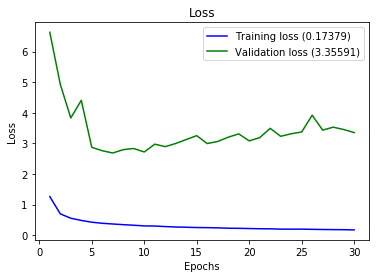

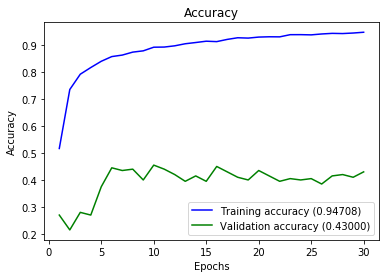

In [3]:
import matplotlib.pyplot as plt
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
plot_history(history)


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
import itertools
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,y_pred,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

Accuracy : 0.5135135135135135

Classification Report
             precision    recall  f1-score   support

          0    0.20000   0.16667   0.18182         6
          1    0.66667   0.33333   0.44444         6
          2    0.00000   0.00000   0.00000         1
          3    0.75000   0.75000   0.75000         4
          4    0.71429   1.00000   0.83333         5
          5    0.25000   0.40000   0.30769         5
          6    0.25000   1.00000   0.40000         1
          7    0.83333   0.55556   0.66667         9

avg / total    0.56139   0.51351   0.50980        37

[[1 0 0 1 0 3 1 0]
 [3 2 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 3 1 0 0 0]
 [0 0 0 0 5 0 0 0]
 [0 1 0 0 1 2 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 3 1 5]]


C:\Users\dilra\Anaconda3\envs\skeleton\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


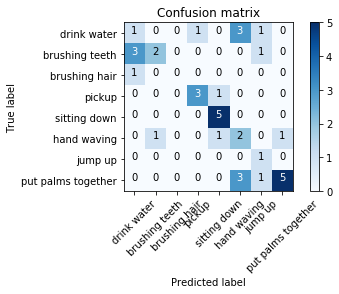

In [4]:
classes = ['drink water','brushing teeth','brushing hair','pickup','sitting down','hand waving','jump up','put palms together']
X = HDF5Matrix('E:/nturgbd_skeletons/3Action/traindataset.h5', 'testdata', 301, 338)
y = HDF5Matrix('E:/nturgbd_skeletons/3Action/traindataset.h5', 'testlabel', 301, 338)

full_multiclass_report(model, X, y, classes)